In [19]:
import pandas as pd
import numpy as np

anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')

## Data preparation

In [20]:
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [21]:
anime_df.shape

(12294, 7)

In [22]:
anime = anime_df.loc[:,["anime_id","name"]]
anime.head()

,anime_id,name
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,Steins;Gate
4,9969,Gintama&#039;


In [23]:
rating_df.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [24]:
# number of users in the dataset
len(rating_df.user_id.unique())

73515

In [25]:
data = pd.merge(rating_df, anime)
data.head(10)

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season
5,1,355,-1,Shakugan no Shana
6,1,356,-1,Fate/stay night
7,1,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...
8,1,487,-1,Girls Bravo: Second Season
9,1,846,-1,School Rumble Ni Gakki


<span> Cheking for the activeness of the users by counting the nulbre of ratings (other than -1) </span>

In [26]:
# Filter out rows where rating is -1
filtered_df = data[data['rating'] != -1]

# Count the number of ratings for each user_id
user_rating_counts = filtered_df.groupby('user_id')['rating'].count().reset_index()


# Rename the column for clarity
user_rating_counts.columns = ['user_id', 'ratings_count']

print(user_rating_counts)

       user_id  ratings_count
0            1              4
1            2              1
2            3             92
3            5            459
4            7            343
...        ...            ...
69595    73512             12
69596    73513             33
69597    73514              1
69598    73515            179
69599    73516              2

[69600 rows x 2 columns]


### Exploration (skipped ratings)

In [40]:
# Keep only the rows where rating is -1
empty_df = data[data['rating'] == -1]

# Count the number of ratings for each user_id
user_missing_rating_counts = empty_df.groupby('user_id')['rating'].count().reset_index()

user_missing_rating_counts.columns = ['user_id', 'empty_ratings_count']

print(user_missing_rating_counts)


       user_id  empty_ratings_count
0            1                  149
1            2                    2
2            3                    2
3            4                   52
4            5                    8
...        ...                  ...
37122    73504                    1
37123    73505                    1
37124    73510                    1
37125    73512                    1
37126    73515                   17

[37127 rows x 2 columns]


In [41]:
# Merge the dataframes on 'user_id' using an outer join
user_feedback = pd.merge(user_rating_counts, user_missing_rating_counts, on='user_id', how='outer')

# Fill missing values with 0 (in case a user exists in only one of the dataframes)
user_feedback['ratings_count'] = user_feedback['ratings_count'].fillna(0).astype(int)
user_feedback['empty_ratings_count'] = user_feedback['empty_ratings_count'].fillna(0).astype(int)

# Now the user_feedback will have all 73515 users with their respective counts
print(user_feedback)

       user_id  ratings_count  empty_ratings_count
0            1              4                  149
1            2              1                    2
2            3             92                    2
3            4              0                   52
4            5            459                    8
...        ...            ...                  ...
73510    73512             12                    1
73511    73513             33                    0
73512    73514              1                    0
73513    73515            179                   17
73514    73516              2                    0

[73515 rows x 3 columns]


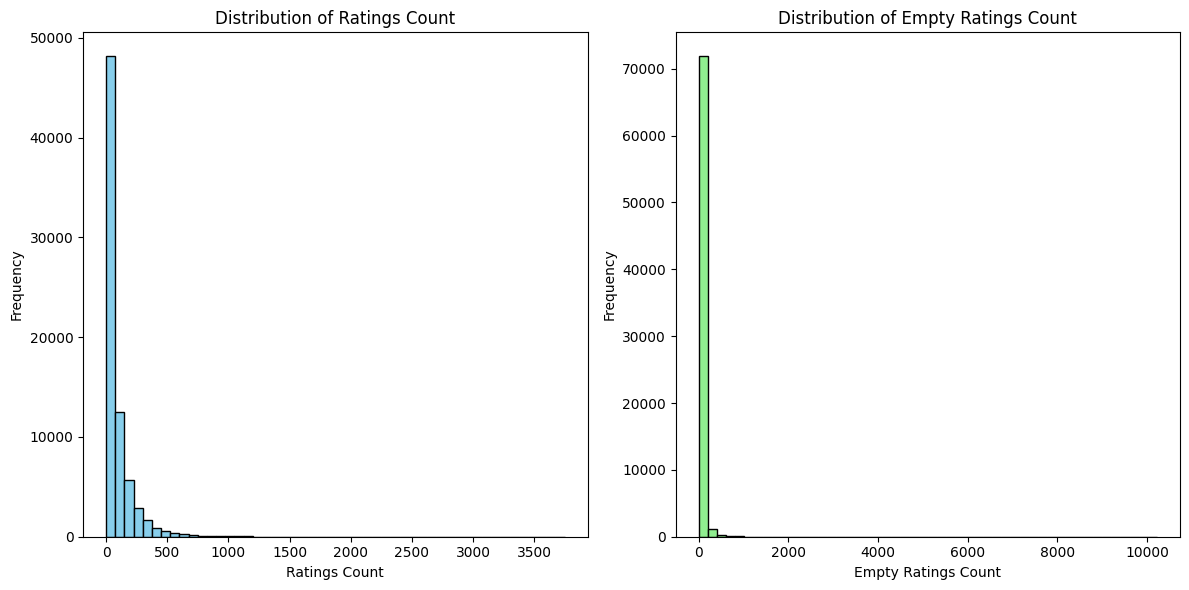

In [42]:
import matplotlib.pyplot as plt

# Plotting histograms for ratings_count and empty_ratings_count
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(user_feedback['ratings_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(user_feedback['empty_ratings_count'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Empty Ratings Count')
plt.xlabel('Empty Ratings Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


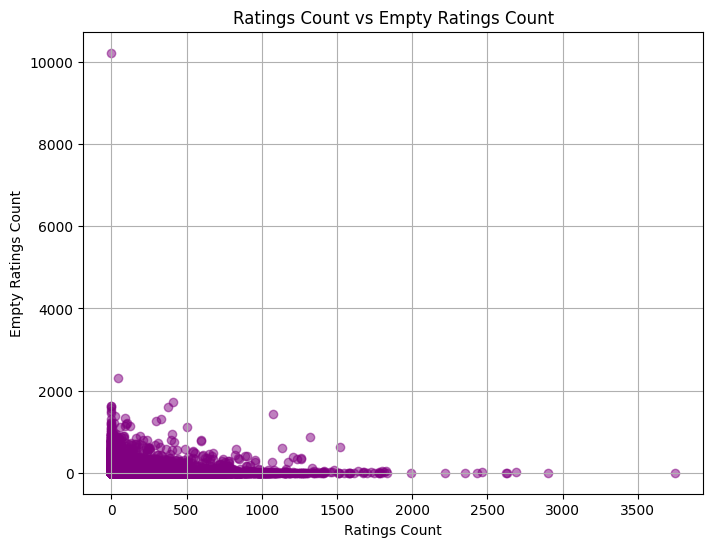

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(user_feedback['ratings_count'], user_feedback['empty_ratings_count'], alpha=0.5, color='purple')
plt.title('Ratings Count vs Empty Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Empty Ratings Count')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

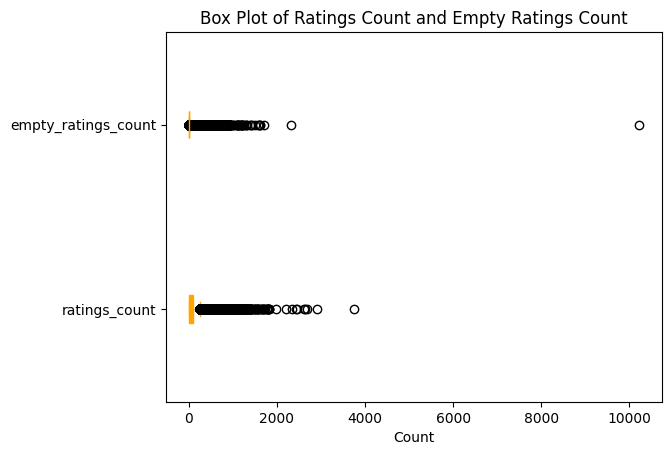

In [31]:
plt.figure(figsize=(8, 6))
user_feedback[['ratings_count', 'empty_ratings_count']].plot(kind='box', vert=False, color='orange', patch_artist=True)
plt.title('Box Plot of Ratings Count and Empty Ratings Count')
plt.xlabel('Count')
plt.show()


In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(user_rating_counts['count_of_ratings'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Ratings per User')
plt.yscale('log')  # Optional: log scale for clearer view of lower counts
plt.show()

KeyError: 'count_of_ratings'

<Figure size 1000x600 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 6))
plt.boxplot(user_rating_counts['count_of_ratings'], vert=False)
plt.xlabel('Number of Ratings per User')
plt.title('Box Plot of Ratings per User')
plt.show()

KeyError: 'count_of_ratings'

<Figure size 1000x600 with 0 Axes>

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(user_rating_counts['count_of_ratings'], color='skyblue', fill=True)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Density')
plt.title('Density Plot of Ratings per User')
plt.show()


KeyError: 'count_of_ratings'

<Figure size 1000x600 with 0 Axes>

In [ ]:
from scipy import stats

# Calculate the z-scores for the rating counts
user_rating_counts['z_score'] = stats.zscore(user_rating_counts['count_of_ratings'])

# Define a threshold, e.g., z-score > 3 or z-score < -3 as an outlier
outliers = user_rating_counts[(user_rating_counts['z_score'] > 1) | (user_rating_counts['z_score'] < -1)]

print(outliers[['user_id', 'count_of_ratings', 'z_score']])


KeyError: 'count_of_ratings'

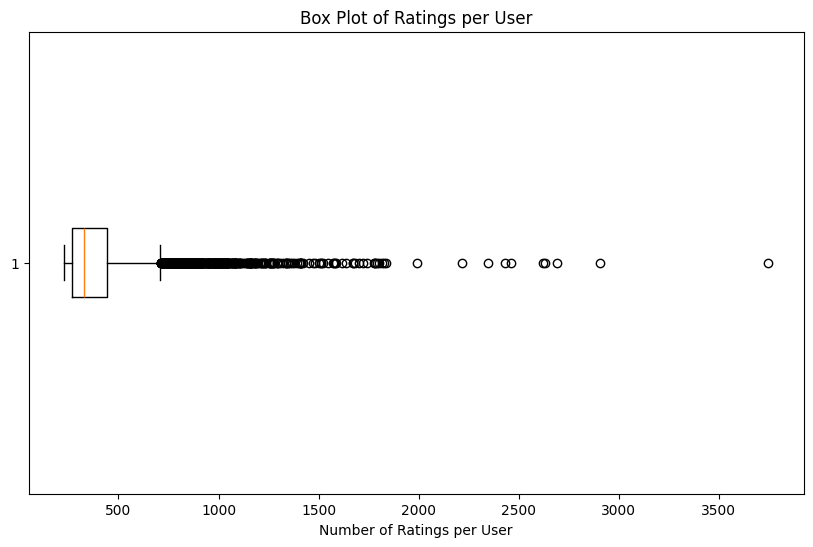

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(outliers['count_of_ratings'], vert=False)
plt.xlabel('Number of Ratings per User')
plt.title('Box Plot of Ratings per User')
plt.show()

In [18]:
min_ratings = outliers['count_of_ratings'].min()
print("Minimum number of ratings per user:", min_ratings)


NameError: name 'outliers' is not defined

### Users Filtering 

<span> Deleting users with less than 50 rating </span>



In [33]:
new_data = user_rating_counts[user_rating_counts['ratings_count']>=50]
new_data

,user_id,ratings_count
2,3,92
3,5,459
4,7,343
8,11,110
10,14,123
...,...,...
69586,73503,246
69587,73504,105
69590,73507,259
69593,73510,134


In [34]:
# remove the users with less than 50 non empty ratings

# Merge the two dataframes to keep only the user_ids from new_data
filtered_rating_df = data[data['user_id'].isin(new_data['user_id'])]

# Optionally, view the filtered dataframe
# print(filtered_rating_df[['user_id', 'anime_id', 'rating']])
filtered_rating_df

,user_id,anime_id,rating,name
156,3,20,8,Naruto
157,3,154,6,Shaman King
158,3,170,9,Slam Dunk
159,3,199,10,Sen to Chihiro no Kamikakushi
160,3,225,9,Dragon Ball GT
...,...,...,...,...
7813720,73515,13659,8,Ore no Imouto ga Konnani Kawaii Wake ga Nai.
7813721,73515,14345,7,Btooom!
7813722,73515,16512,7,Devil Survivor 2 The Animation
7813723,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain


### Anime Filetering

<span> Deleting animes with less than 10 reviews </span>

In [43]:
# Group by 'anime_id' and count the number of ratings for each anime
anime_rating_counts = rating_df.groupby('anime_id')['rating'].count().reset_index()

# Rename the column to reflect the count of ratings
anime_rating_counts.columns = ['anime_id', 'ratings_count']

# Optionally, view the result
print(anime_rating_counts)


       anime_id  ratings_count
0             1          15509
1             5           6927
2             6          11077
3             7           2629
4             8            413
...         ...            ...
11195     34367              5
11196     34412              1
11197     34475              4
11198     34476              1
11199     34519              1

[11200 rows x 2 columns]


In [44]:
anime_32281_ratings_count = anime_rating_counts[anime_rating_counts['anime_id'] == 32281]['ratings_count'].values[0]

print(f"Anime ID 32281 has {anime_32281_ratings_count} ratings.")


Anime ID 32281 has 2199 ratings.


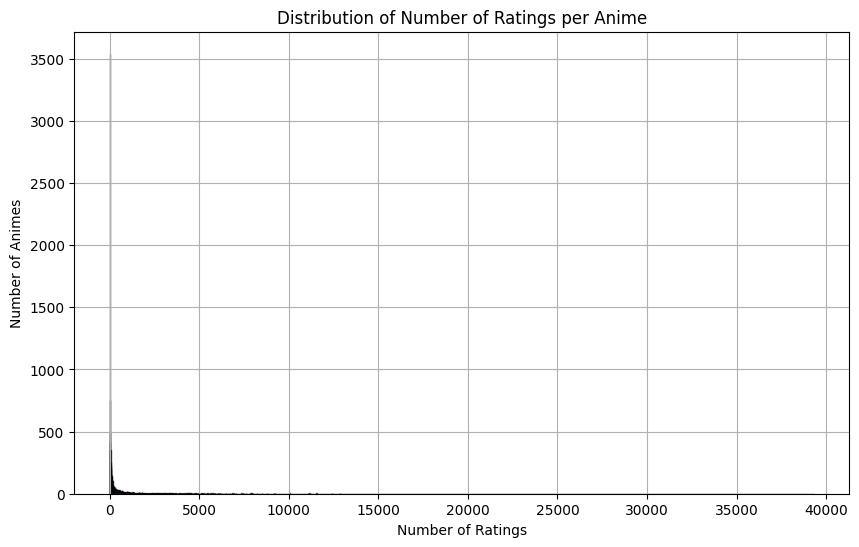

In [45]:
import matplotlib.pyplot as plt

# Plot the distribution of the number of ratings for each anime
plt.figure(figsize=(10, 6))
plt.hist(anime_rating_counts['ratings_count'], bins=range(1, anime_rating_counts['ratings_count'].max() + 1, 10), edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Ratings per Anime')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Animes')
plt.grid(True)
plt.show()


In [46]:
# Set a threshold for the minimum number of ratings
threshold = 10

# Filter out animes with fewer than the threshold of ratings
filtered_anime_rating_counts = anime_rating_counts[anime_rating_counts['ratings_count'] >= threshold]

filtered_anime_rating_counts


,anime_id,ratings_count
0,1,15509
1,5,6927
2,6,11077
3,7,2629
4,8,413
...,...,...
11186,34238,39
11188,34240,1546
11190,34283,20
11191,34324,17


In [47]:
# remove the ANIMES with less than 10 ratings

# Merge the two dataframes to keep only the user_ids from new_data
final_data = filtered_rating_df[filtered_rating_df['anime_id'].isin(filtered_anime_rating_counts['anime_id'])]

# Optionally, view the filtered dataframe
# print(filtered_rating_df[['user_id', 'anime_id', 'rating']])
final_data

,user_id,anime_id,rating,name
156,3,20,8,Naruto
157,3,154,6,Shaman King
158,3,170,9,Slam Dunk
159,3,199,10,Sen to Chihiro no Kamikakushi
160,3,225,9,Dragon Ball GT
...,...,...,...,...
7813720,73515,13659,8,Ore no Imouto ga Konnani Kawaii Wake ga Nai.
7813721,73515,14345,7,Btooom!
7813722,73515,16512,7,Devil Survivor 2 The Animation
7813723,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain


## Recommendation system : Collaborative Filtering

### 1. Memory-Based Collaborative Filtering

**Creating the User-Item Matrix Creation**

#####   1.1. User-Based Collaborative Filtering

##### 1.2. Item-Based Collaborative Filtering

In [19]:
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
pivot_table = final_data.pivot_table(index = ["user_id"],columns = ["name"],values = "rating")
pivot_table.head(10)

name,&quot;0&quot;,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,...,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pivot_table

name,&quot;0&quot;,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,...,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,8.0,8.0
73504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,9.0,9.0,NaN,9.0


In [85]:
anime_watched = pivot_table["Slam Dunk"]
similarity_with_other_animes = pivot_table.corrwith(anime_watched)  # find correlation between "Slam Dunk" and other animes
similarity_with_other_animes = similarity_with_other_animes.sort_values(ascending=False)
similarity_with_other_animes.head(100)

c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\hp\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


name
&quot;0&quot;                                                           1.0
Ai no Gakko Cuore Monogatari                                            1.0
Five Card                                                               1.0
Midnight Panther                                                        1.0
Black Jack ONA                                                          1.0
                                                                       ... 
Tetsuko no Tabi                                                         1.0
Hatsune Miku x Tetsuya Nomura                                           1.0
Dr. Slump Movie 07: Arale-chan N-cha! Penguin Mura yori Ai wo Komete    1.0
Doraemon Movie 02: Nobita no Uchuu Kaitakushi                           1.0
Dragon Knight Gaiden                                                    1.0
Length: 100, dtype: float64

In [84]:
similarity_with_other_animes.head(100)

name
&quot;0&quot;                                                           1.0
Ai no Gakko Cuore Monogatari                                            1.0
Five Card                                                               1.0
Midnight Panther                                                        1.0
Black Jack ONA                                                          1.0
                                                                       ... 
Tetsuko no Tabi                                                         1.0
Hatsune Miku x Tetsuya Nomura                                           1.0
Dr. Slump Movie 07: Arale-chan N-cha! Penguin Mura yori Ai wo Komete    1.0
Doraemon Movie 02: Nobita no Uchuu Kaitakushi                           1.0
Dragon Knight Gaiden                                                    1.0
Length: 100, dtype: float64

https://medium.com/@aliozan_memetoglu/4-collaborative-filtering-and-knn-f997f8993256

In [21]:
# Get the average rating for each user 
avg_ratings = pivot_table.mean(axis=1)
# Center each users ratings around 0
user_ratings_table_centered = pivot_table.sub(avg_ratings, axis=0)
# Fill in the missing data with 0s
user_ratings_table_normed = user_ratings_table_centered.fillna(0)

In [22]:
user_ratings_table_normed

name,&quot;0&quot;,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,...,gdgd Fairies,gdgd Fairies 2,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,-2.261803,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,0.0,0.0,0.000000,0.804878,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73503,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.581301,1.581301,0.000000,1.581301,1.581301
73504,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73507,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,2.185328,1.185328,1.185328,0.000000,1.185328


In [49]:
# from sklearn.metrics.pairwise import cosine_similarity

# # Generate the similarity matrix
# similarities = cosine_similarity(user_ratings_table_normed)

# # Wrap the similarities in a DataFrame
# cosine_similarity_df = pd.DataFrame(similarities, index=user_ratings_table_normed.index, columns=user_ratings_table_normed.index)

# # Find the similarity values for a specific movie
# cosine_similarity_series = cosine_similarity_df.loc[4]

# # Sort these values highest to lowest
# ordered_similarities = cosine_similarity_series.sort_values(ascending=False)
# print(ordered_similarities)

In [48]:
# similarities = cosine_similarity(user_ratings_table_normed)
# cosine_similarity_df = pd.DataFrame(similarities, index=user_ratings_table_normed.index, columns=user_ratings_table_normed.index)
# cosine_similarity_df.head()

### 2. Model-Based Collaborative Filtering


#### A. Matrix Factorization


#### B. Neural Collaborative Filtering

### Collaborative Filtering using KNN

## Recommendation system : Content-Based Filtering